# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [868]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [869]:
import sklearn
sklearn.__version__

'0.21.3'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [870]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

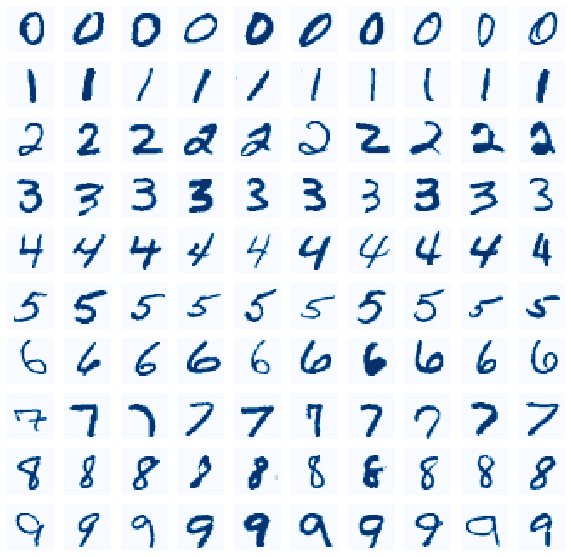

In [871]:
# come back and revise
def P1(num_examples=10):
    """Returns a 10*10 grid of examples of drawn digits from MNIST data set"""
    plt.rc('image', cmap ='Blues') #set color scale to blue, image tells matplotlib its an image
    digits = np.unique(Y) # unique digit values
    Examps = 10 #number of examples of each digit
    dim = int(np.sqrt(X.shape[1])) 
    fig, axs = plt.subplots(len(digits), Examps, figsize=(10,10)) #sets up subplots for graph
    #Iterate over the digits (which go from 1 to 9)
    for i,d in enumerate(digits): #iterates over digit values 1-10
        # Each subimage
        for j in range(Examps): #iterates over number of examples
            axs[i,j].imshow(X[Y==d][j].reshape((dim,dim))) # convert 1d feature vector into matrix
            axs[i,j].axis('off')
   

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [872]:
#mini_train_data, mini_train_labels
#dev_data, dev_labels
def P2(k_values):
    """Trains K nearest neighter with k =[1,3,5,7,9] and returns classification 
    report including precision, recall, f1-score, accuracy,
    and support for each value of k"""
    for val in k_values:
        k_neigh = KNeighborsClassifier(n_neighbors=val)
        k_neigh.fit(mini_train_data, mini_train_labels)
        y_predict = k_neigh.predict(dev_data)
        clas_rep = classification_report(dev_labels, y_predict, output_dict=True)
        accuracy = clas_rep['accuracy']
        if val == 1:
             print(f'{classification_report(dev_labels, y_predict)}') #prints full classification report for 1 nearest neighbor
        else:
            print(f'When K is {val} the accuracy is {accuracy}') #returns the accuracy of each knearest neighbor model
        
        
    

    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

When K is 3 the accuracy is 0.876
When K is 5 the accuracy is 0.882
When K is 7 the accuracy is 0.877
When K is 9 the accuracy is 0.875


ANSWER: When k = 1, it has the hardest time predicting 9

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [873]:
def P3(train_sizes, accuracies):
    """Trains a 1-Nearest Neighbor Model on training data of various sizes
    and returns classification metrics on the development set. For each training
    size the algorithm returns the amount of time the iteration took."""
    for i in train_sizes: #iterates over training sizes
        neighbors = KNeighborsClassifier(n_neighbors=1) # innitialized KNeighbors class with 1 nearest neighbor 
        data_subsets = train_data[:i] #indexes data by size of set
        labels_subsets = train_labels[:i] # indexes label by size of set    
        neighbors.fit(data_subsets, labels_subsets) #fits model
        predictions = neighbors.predict(dev_data) #makes prediction
        start = time.time() #starts time for classification report
        class_report = classification_report(dev_labels, predictions,output_dict=True)
        accuracies.append(class_report) #appends accuracies to list
        stop = time.time() #ends clock for classification report
        duration = stop - start # duration for the classification report to run
        print(f'Training size is {i}')
        print(f' The classification report took {duration} to run')
        print(f'{classification_report(dev_labels, predictions)}')
    return accuracies
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
result = P3(train_sizes, accuracies)

Training size is 100
 The classification report took 0.018263816833496094 to run
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       106
           1       0.70      0.99      0.82       118
           2       0.77      0.51      0.61       106
           3       0.72      0.68      0.70        97
           4       0.49      0.78      0.61        92
           5       0.81      0.72      0.76        88
           6       0.87      0.65      0.74       102
           7       0.69      0.89      0.78       102
           8       0.71      0.45      0.55        94
           9       0.67      0.40      0.50        95

    accuracy                           0.70      1000
   macro avg       0.72      0.69      0.69      1000
weighted avg       0.72      0.70      0.69      1000

Training size is 200
 The classification report took 0.01703786849975586 to run
              precision    recall  f1-score   support

           0       0.88  

### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

The R^2 value is for the linear model is 0.4177006634161019
The predicted accuracies for training set sizes of 60000, 120000,1000000 is:[[1.23617317]
 [1.63742805]
 [7.52249967]] which is off since this is not a linear relationship


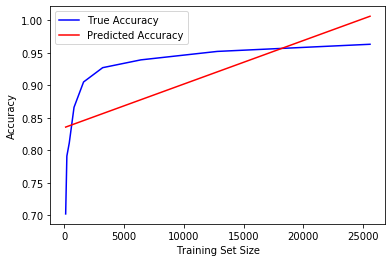

The are R^2 value for the log transformed model is 0.897257996464663
The predicted accuracies for training set sizes of 60000, 120000,1000000 for the log transofmred data data is:[[1.03358792]
 [1.06432125]
 [1.15833125]] which is still too high


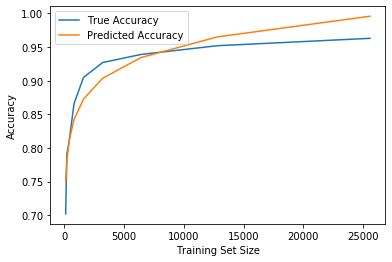

The are R^2 value for the odds ratio transformed model is 0.8438030429116081
The predicted accuracies for training set sizes of 60000, 120000,1000000 for the fully transformed data is:[[0.98329271]
 [0.99111439]
 [0.99887043]] which is still too high


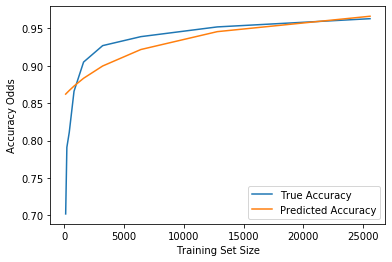

The are R^2 value for the transofmred model is 0.9395242859897991
The predicted accuracies for training set sizes of 60000, 120000,1000000 for the fully transformed data is:[[0.96307017]
 [0.96659196]
 [0.97413657]] which is closer


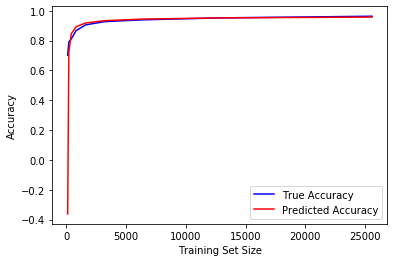

In [874]:
from sklearn.metrics import r2_score
def P4(training_size_pred = [60000,120000,1000000]):
    """Function returns linear model, transformed model with log(X), transformed model with odds ratio of Y,
    and model with log transformed X and odds transformed Y to predict accuracy of K-nearest neighbors Model based on size of training data.
    For each model, a graph is returned which shows predicted vs actual values"""
    def lin_reg(x, y, x_hat =training_size_pred):
        "helper function to produce linear regression model"
        y = np.array(y).reshape(-1, 1)
        reg = LinearRegression() #innitialize linear regression class
        reg.fit(x,y) #fits data
        y_hat = reg.predict(x)# predict on known training values
        r_2_lin = r2_score(y, y_hat) # gives r^2 values
        print(f'The R^2 value is for the linear model is {r_2_lin}')
        X_hat = np.array(training_size_pred).reshape(-1,1) # reshape data into correct form
        y_hat_new_size = reg.predict(X_hat)
        print(f'The predicted accuracies for training set sizes of 60000, 120000,1000000 is:{y_hat_new_size}')
        return y_hat_new_size
    #Model without any transformation
    y =[res['accuracy'] for res in result] # pull accuracy values into a list
    y = np.array(y).reshape(-1, 1) #reshape for prediction
    train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
    X = np.array(train_sizes).reshape(-1,1)#training sizes pulled from part 3
    
    reg = LinearRegression() #innitialize linear regression class
    reg.fit(X,y) # fit to non transformed data
    y_hat = reg.predict(X) # predict on known training values
    r_2_lin = r2_score(y, y_hat) # gives r^2 values for non transformed model
    print(f'The R^2 value is for the linear model is {r_2_lin}')
    #Now make prediction onto unknown training size of [60000, 120000,1000000]
    X_hat = np.array(training_size_pred).reshape(-1,1) # reshape data into correct form
    y_hat_new_size = reg.predict(X_hat)
    print(f'The predicted accuracies for training set sizes of 60000, 120000,1000000 is:{y_hat_new_size} which is off since this is not a linear relationship')
    plt.plot(X, y, '-b', label = "True Accuracy")
    plt.plot(X, y_hat, '-r', label = "Predicted Accuracy")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    
    #Model with log transformed X 
    X_log = np.log(X)
    log_reg = LinearRegression()
    log_reg.fit(X_log, y)
    y_hat_logx = log_reg.predict(X_log)
    log_Xhat = np.log(X_hat) # log of new training sizes
    y_hat_log_new_vals = log_reg.predict(log_Xhat)
    r_2_log = r2_score(y_hat_logx, y)
    print(f'The are R^2 value for the log transformed model is {r_2_log}')
    print(f'The predicted accuracies for training set sizes of 60000, 120000,1000000 for the log transofmred data data is:{y_hat_log_new_vals} which is still too high')
    #R^2 value
    # Now make log transformed plots
    plt.plot(np.exp(X_log), y, label = "True Accuracy")
    plt.plot(np.exp(X_log), y_hat_logx, label = "Predicted Accuracy")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    
    #Model with odds transformed y
    odds_reg = LinearRegression() #innitialize new linear regresion class
    prob_to_odds = lambda x: y/(1-y) #make function to conver probability to odds ratio
    y_odds = prob_to_odds(y)
    odds_reg.fit(X, y_odds) #fit regresion on non-transformed X and odds transformed y
    y_hat_odds = odds_reg.predict(X) #predict on non-transformed matrix X
    #Convert back to probability to see performance
    y_hat_odds_new = odds_reg.predict(X_hat)
    odd_to_prob = lambda y: y/(1.0+y)
    y_hat_p = odd_to_prob(y_hat_odds_new)
    r_2_odds = r2_score(y_hat_odds, y_odds)
    print(f'The are R^2 value for the odds ratio transformed model is {r_2_odds}')
    print(f'The predicted accuracies for training set sizes of 60000, 120000,1000000 for the fully transformed data is:{y_hat_p} which is still too high')
    # Now make log transformed plots
    plt.plot(X, odd_to_prob(y_odds), label = "True Accuracy")
    plt.plot(X, odd_to_prob(y_hat_odds), label = "Predicted Accuracy")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Odds")
    plt.legend()
    plt.show()
    
    #Model with transofmred X & Y
    # Now transform data and test metrics
    trans_reg = LinearRegression() # innitialize new class for transformed regression
    trans_reg.fit(X_log, y_odds) #fit to transformed data
    y_hat_trans = trans_reg.predict(X_log) # predict y values with transformed regression
    y_hat_trans_new = trans_reg.predict(log_Xhat)  #predict on different training size
    r_2_trans = r2_score(y_odds, y_hat_trans) # get r^2 for converted values
    print(f'The are R^2 value for the transofmred model is {r_2_trans}')
    #Convert back to probability 
    y_hat_prob = odd_to_prob(y_hat_trans_new)
    print(f'The predicted accuracies for training set sizes of 60000, 120000,1000000 for the fully transformed data is:{y_hat_prob} which is closer')
    #Make new graphs for the fully tranformed model
    trans_plot = plt.plot(np.exp(X_log), odd_to_prob(y_odds), '-b', label = "True Accuracy")
    trans_plot= plt.plot(np.exp(X_log), odd_to_prob(y_hat_trans), '-r', label = "Predicted Accuracy")
    trans_plot = plt.xlabel("Training Set Size")
    trans_plot = plt.ylabel("Accuracy")
    trans_plot = plt.legend()

P4()
    
    
    
    

Linear Regression is inappropiate in this context because the relationship is not at all linear. Therefore the predictions are substantially wrong

ANSWER:

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


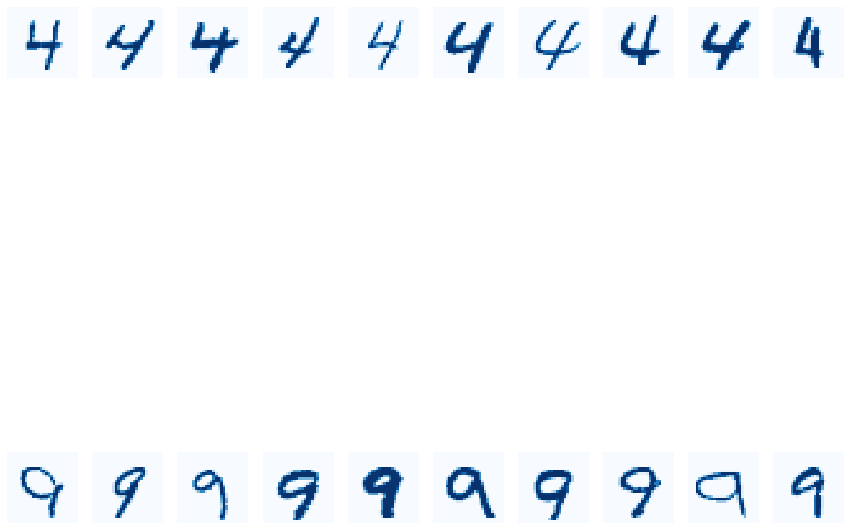

In [875]:

def P5():
    """Fits 1-Nearest Neighbor on Mini-Train Data and Predicts onto Dev_data.
    To show performance, the confusion matrix is returned along with
    the images of the most confused digits"""
    neigh = KNeighborsClassifier(n_neighbors=1) #innitialize knearest neighbor class with k=1
    neigh.fit(mini_train_data, mini_train_labels) #fit knearest neighbors
    y_pred = neigh.predict(dev_data) # predict on development data
    conf_matrix = confusion_matrix(dev_labels, y_pred)
    print(conf_matrix)
    
    #define function to filter numpy array to specific values
    def filter_where(array):
        array = [num for num in array if str(num) == '4' or str(num) == '9']
        return array
    digits = np.unique(dev_labels)# unique digit values
    bad_dig = filter_where(digits) # filter array to just 4 and 9
    
    #Show images
    plt.rc('image', cmap ='Blues') #set color scale to blue, image tells matplotlib its an image
    Examps = 10 # number of examples of each digit
    dim = int(np.sqrt(X.shape[1])) # co
    fig, axs = plt.subplots(len(bad_dig), Examps, figsize=(15,15))
    #Iterate over the poorly identified digits (4 and 9)
    for i,d in enumerate(bad_dig):
        # Each subimage
        for j in range(Examps):
            axs[i,j].imshow(X[Y==d][j].reshape((dim,dim))) # convert 1d feature vector into matrix
            axs[i,j].axis('off')
            
                
            
            



P5()

ANSWER: It most often confuses 4 and 9

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [876]:
#potentially show blurred images
def blur(image):
    "Applies a Gaussian Blur to an Image"
    gauss_data = []
    filter_ = 1/9*np.ones((3,3)) #gets average of 3*3 matrix (nearest 8 pixels)
    for row in range(len(image)):
        no_blur = image[row].reshape(28,28) #changes row to 28*28 matrix
        pad_no_blur = np.pad(no_blur, (1,1),'edge')
        gauss_blur =np.zeros((28,28))
        for idx, rw in enumerate(no_blur, 1): #iterate over no blur
            for ix,col in enumerate(rw, 1): #iterate over columns, same as transpose of original matrix
                gauss_blur[idx-1, ix-1]= np.sum(pad_no_blur[idx-1:idx+2, ix-1:ix+2]*filter_) 
        gauss_data.append(gauss_blur)
    return np.array(gauss_data).reshape((1000,784))

def knn(train_x, train_y, eval_x, eval_y):
    k1 = KNeighborsClassifier(n_neighbors=1) #innitializes class
    k1.fit(train_x, train_y) #fits
    y_pred = k1.predict(eval_x)
    class_rep = classification_report(eval_y, y_pred, output_dict=True)
    return class_rep
mini_train_blur = blur(mini_train_data)
blur_dev = blur(dev_data)

#create models, starting with no blur
no_blur = knn(mini_train_data, mini_train_labels, dev_data, dev_labels) # data without a blur
print(f"The no blur accuracy is {no_blur.get('accuracy')}")

#blurred training data
blur_train = knn(mini_train_blur, mini_train_labels, dev_data, dev_labels)
print(f"The blurred training data accuracy is {blur_train.get('accuracy')}")

#blurred dev data but not training ddata
blur_dev_res = knn(mini_train_data, mini_train_labels, blur_dev, dev_labels)
print(f"The blurred dev data accuracy is {blur_dev_res.get('accuracy')}")

#blurred training data and devolopment data
blur_train_dev = knn(mini_train_blur, mini_train_labels, blur_dev, dev_labels)
print(f"The blurred training and dev data accuracy is {blur_train_dev.get('accuracy')}")





The no blur accuracy is 0.884
The blurred training data accuracy is 0.907
The blurred dev data accuracy is 0.868
The blurred training and dev data accuracy is 0.905


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [877]:
#def P7():
### STUDENT START ###
def bernouli_nb(train_x, train_labels, eval_x, eval_labels):
    "Fits Bernouli Naive Baye's Model"
    nbb_mod = BernoulliNB(binarize=0.1) #sets binarize threshold to 0.1, innitializes object
    nbb_mod.fit(train_x, train_labels) #fits model
    y_pred = nbb_mod.predict(eval_x)
    return classification_report(eval_labels,y_pred)
print(bernouli_nb(mini_train_data, mini_train_labels, dev_data, dev_labels))

def map_cat(data):
    "Maps decimals to categorical values based on range"
    data =np.where(data >0.9, 2, #if data greater than 0.9 then 2 which is black
         (np.where((data>=0.1), 1, 0))) #if data greater than 0.1 then 1 which is grey, else 0
    return data

def multinomial_nb(train_x, train_labels, eval_x, eval_labels):
    "fits Multinomial Naive Baye's Model"
    map_train_x, map_eval_x = map_cat(train_x), map_cat(eval_x) #converts values in arrays to categorical
    mbb_mod = MultinomialNB()
    mbb_mod.fit(map_train_x, train_labels)
    y_pred = mbb_mod.predict(map_eval_x)
    return  classification_report(eval_labels, y_pred)
print(multinomial_nb(mini_train_data, mini_train_labels, dev_data, dev_labels)) 



### STUDENT END ###

#P7()

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       106
           1       0.88      0.95      0.91       118
           2       0.81      0.72      0.76       106
           3       0.74      0.76      0.75        97
           4       0.76      0.85      0.80        92
           5       0.83      0.68      0.75        88
           6       0.87      0.88      0.88       102
           7       0.88      0.86      0.87       102
           8       0.65      0.72      0.68        94
           9       0.78      0.77      0.77        95

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.87      0.87      0.87       118
           2       0.79      0.73      0.75       106
           3       0.76 

ANSWER:The results stayed the same. Before running my code, I thought the Multinomial Baye's would probably perform better because unlike Bernouli Naive Baye's Multinomial Baye's accounts for multiple features that occur which I thought would help distinguish between white, grey, and black and thus improve the classification. However, the results proved to be identical probably because there is no need to distinguish between grey and black and white and grey. The threshold of 0.1 for the Bernouli adequately establishes a threshold. For some digits, there is a difference in accuracy. For example, the multinomial model has a higher accuracy predicting 4, but oddly enough, a lower accuracy on 9.

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [878]:
def search_grid(train_x, train_labels, alphas):
    "Implements CV Grid Search"
    grd_bnb=GridSearchCV(estimator=BernoulliNB(binarize=0.0), 
                         param_grid=alphas, cv=5, iid=False, return_train_score=True, scoring = 'accuracy') #innitializes model and passes naive bayes and alpha as argument
    grd_bnb.fit(train_x,train_labels)
    #print(grd_bnb.cv_results_)
    return grd_bnb
    

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = search_grid(mini_train_data, mini_train_labels,alphas)
results = nb.cv_results_
print(results.get('mean_test_score'), results.get('params'))

print(f"Best alpha = {nb.best_params_}, Training Score{nb.scorer_}")






[0.81270211 0.82081784 0.82484973 0.81984819 0.81781774 0.8158161
 0.81077913 0.80480195 0.78058383] [{'alpha': 1e-10}, {'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 0.5}, {'alpha': 1.0}, {'alpha': 2.0}, {'alpha': 10.0}]
Best alpha = {'alpha': 0.001}, Training Scoremake_scorer(accuracy_score)


ANSWER:The best alpha value is 0.0001. When the alpha is near zero the accuracy is 0.819 which is higher than what I expected. I was concerned that with such a low smoothing parameter the model would overfit.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [879]:
#can access theta_ and sigma_ 
def gaussian_nb(train_x, train_y, dev_x, dev_y):
    gnb = GaussianNB() #innitalizes Gaussian Naive bayes class
    gnb.fit(train_x, train_y)#fits model to training data
    y_pred = gnb.predict(dev_x)
    return classification_report(dev_y, y_pred, output_dict=True)
non_t = gaussian_nb(mini_train_data, mini_train_labels, dev_data,dev_labels)
print(f"The non-transformed accuracy is {non_t.get('accuracy')}")

def transformed_gaus_nb(train_x, train_y, dev_x, dev_y):
    gnb = GaussianNB()#innitalizes Gaussian Naive bayes class
    gnb = gnb.set_params(var_smoothing=0.1) #better approximates gaussian data
    gnb.fit(train_x, train_y)#fits model to training data
    #gnb.sigma_ = np.full((10, 784), 0.01) 
    y_pred = gnb.predict(dev_x)
    return classification_report(dev_y, y_pred, output_dict=True)

t_nb = transformed_gaus_nb(mini_train_data, mini_train_labels, dev_data, dev_labels)
print(f"The transformed accuracy is {t_nb.get('accuracy')}")
    

The non-transformed accuracy is 0.593
The transformed accuracy is 0.817


ANSWER:The data does not follow a gaussian distribution. I used a smoothing parameter which helps the data approximate a gaussian distribution. This drastically improved the accuracy from 59% to 81.7%. Without this transformation, a Bernouli transformation is more logical.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

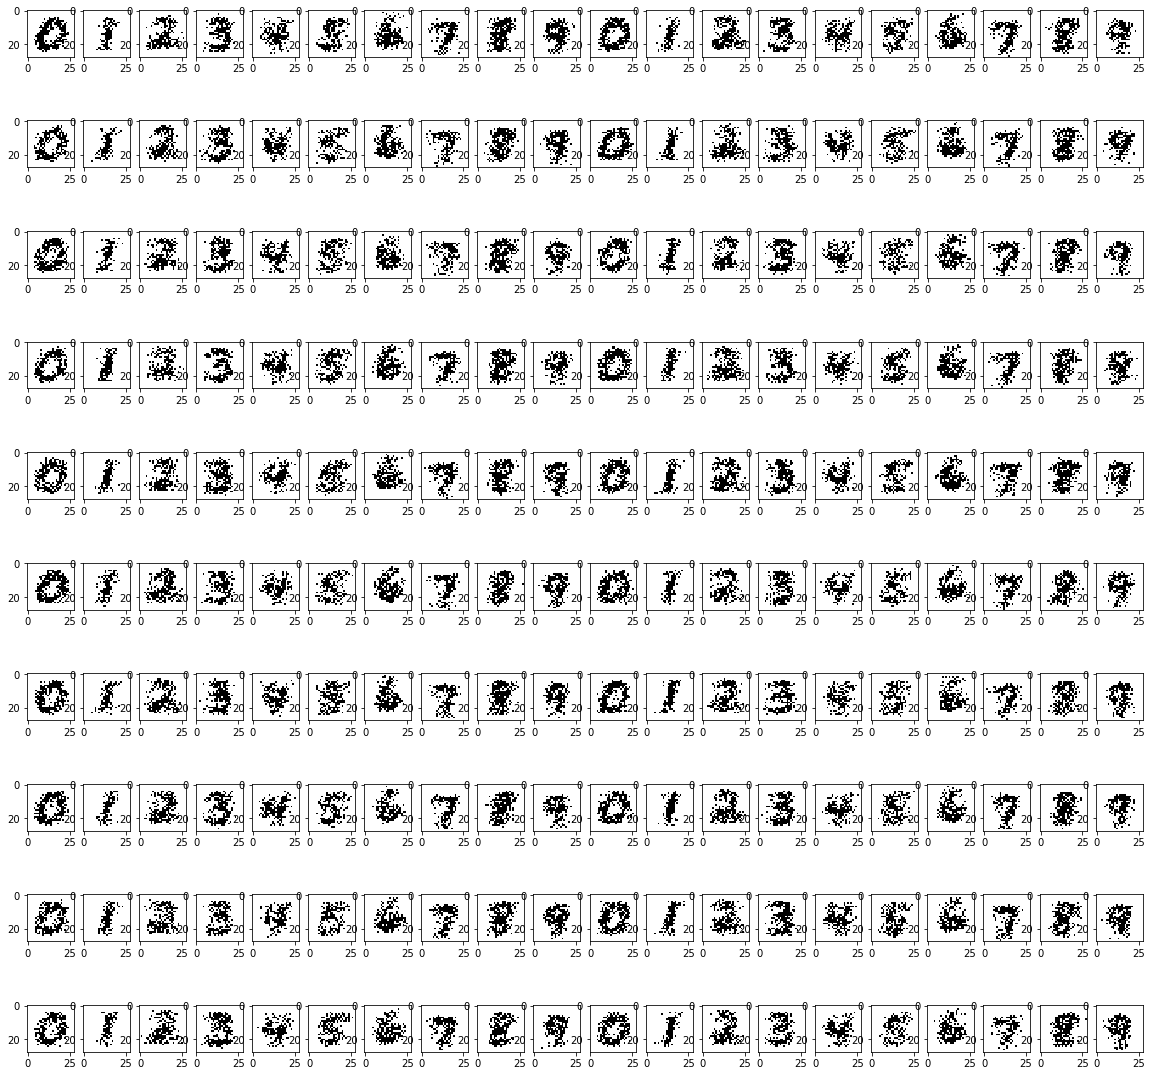

In [880]:
def make_data():
    "Generates Digit Data Using Bernouli Naive Bayes Model"
    
    def bern_nb_prob():
        bnb = BernoulliNB(binarize=0, alpha=0.001) #innitializes model and uses ideal alpha value
        bnb.fit(train_data, train_labels)
        bnb_prob = np.exp(bnb.feature_log_prob_) # shape = (10, 784)
        return bnb_prob
    
    bnb_probs = bern_nb_prob() # fits bernouli NB model and returns the exponents of the log probabilities, has shape 10*784
    
    gen_image = [] #empyt array to fill
    
    for i in range(20):
        for j in range(10):
            generated_data = []
            for idx, val in enumerate(bnb_probs[j],1):
                if np.random.rand()>val: # if the value is black
                    generated_data.append(1) # then you append 1
                else: #the image is white
                    generated_data.append(0) #append 0 for white images
            gen_image.append(generated_data) #append to empty list
            
    final_matrix = []
    for val in range(len(gen_image)):
        mat = np.reshape(gen_image[val], (28, 28))
        final_matrix.append(mat)
    return final_matrix
            

def graph_data():
    examps = 20
    # sets figure size to 10*10
    fig, axs = plt.subplots(10, examps, figsize=(20, 20))
    # set colormap to grey
    plt.rc('image', cmap='gray')
    for i in range(10):
        for j in range(20):
            axs[i][j].imshow(make_data()[j])
    plt.show()
           
graph_data()



ANSWER: The digits clearly are digits however they are far more pixelated than the original data. This makes sense because we used the Naive Baye's to generate the data. 

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [881]:
def P11(buckets, correct, total):
    "Segments predicted probabilities into buckets and then compares predicted accuracy to actual accuracy"
    bnb = BernoulliNB(binarize=0, alpha=0.001) #innitializes BNB model with binarization factor 0 and alpha 0.001
    bnb.fit(mini_train_data, mini_train_labels) #fits model to the mini train data
    proba = bnb.predict_proba(dev_data) # predicts probability for dev data of each digit
    for idx, row in enumerate(proba): #iterates over the predicted probabilities
        max_row = np.max(row)
        diff = np.abs(buckets - max_row) #substract maximum from bucket
        bucket_idx = diff.argmin() # find smallest difference
        total[bucket_idx] +=1 #increases bucket by one
        buck_pred = str(row.argmax())
        num = dev_labels[idx] #finds actual value of image
        if buck_pred == num:
            correct[bucket_idx] +=1 #adds one for every time the bucket predicted digit == the actual digit
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =  13    accuracy = 0.385
p(pred) is 0.5000000000000 to 0.9000000000000    total =  29    accuracy = 0.310
p(pred) is 0.9000000000000 to 0.9990000000000    total =  66    accuracy = 0.485
p(pred) is 0.9990000000000 to 0.9999900000000    total =  56    accuracy = 0.464
p(pred) is 0.9999900000000 to 0.9999999000000    total =  51    accuracy = 0.667
p(pred) is 0.9999999000000 to 0.9999999990000    total =  56    accuracy = 0.786
p(pred) is 0.9999999990000 to 0.9999999999900    total =  32    accuracy = 0.781
p(pred) is 0.9999999999900 to 0.9999999999999    total =  48    accuracy = 0.771
p(pred) is 0.9999999999999 to 1.0000000000000    total = 649    accuracy = 0.941


ANSWER: I would say the Bernouli Naive Baye's model is not well calibrated because the predicted accuracies are generally speaking underestimated. For example, in the bin that goes from 0.5 to 0.9 the actual accuracy is only 0.31 which is substantially off. The one group which is somewhat (but not even that accurately) calibrated is the 0.9999999999-1.0 group which has an actual accuracy of 0.941.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [882]:
def P12():
    """Feature Engineering BNB Model"""
    def row_avg(data):
        "helper function to take row wise mean"
        row_mean = np.mean(data, axis = 1)
        return row_mean
    mean_mini = row_avg(mini_train_data) #take row wise average of mini_train_data
    transf_mini = mini_train_data/mean_mini[:,None] #divide rows by the averabe
    dev_avg = row_avg(dev_data) #take row average of dev_data
    transf_dev = dev_data/dev_avg[:, None]
    #add column with the averages
    transf_mini= np.hstack((transf_mini, np.atleast_2d(mean_mini).T)) #add average column to mini_train
    transf_dev = np.hstack((transf_dev, np.atleast_2d(dev_avg).T))#add average column to dev data
    
    def bern_nb(train_data, train_labels, test_data, test_labels): #helper function to train and predict BNB model
        "Helper function train and test BNB model"
        bnb = BernoulliNB(binarize=0, alpha=0.001) #innitialize model
        bnb.fit(train_data, train_labels) #train model
        y_pred = bnb.predict(test_data) #predict on test data 
        report = classification_report(test_labels, y_pred)
        return report
    non_engineered_model = bern_nb(mini_train_data, mini_train_labels, dev_data, dev_labels) # make non-feature engineered model
    print(f"the non feature engineered model{non_engineered_model}")
    
    engineered_model = bern_nb(transf_mini, mini_train_labels, transf_dev, dev_labels)
    print(f"the feature-engineered model{engineered_model}")


    


### STUDENT END ###

P12()

the non feature engineered model              precision    recall  f1-score   support

           0       0.94      0.89      0.91       106
           1       0.94      0.92      0.93       118
           2       0.80      0.83      0.81       106
           3       0.72      0.75      0.74        97
           4       0.79      0.84      0.81        92
           5       0.80      0.69      0.74        88
           6       0.91      0.89      0.90       102
           7       0.90      0.85      0.87       102
           8       0.65      0.76      0.70        94
           9       0.78      0.77      0.77        95

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000

the feature-engineered model              precision    recall  f1-score   support

           0       0.94      0.89      0.91       106
           1       0.94      0.92      0.93       118
           2      

Well that didn't improve anything